# **Feedforward Neural Network**

## Single-layer Perceptron
A single layer perceptron predicts a binary label $\hat{y}$ for a given input vector $\boldsymbol{x} \in \mathbb{R}^d$ ($d$ presents the number of dimensions of inputs) by using the following formula,

$$
\hat{y} = \begin{cases}
1 & \text{if }\boldsymbol{w} \cdot \boldsymbol{x} + b>0\\
0 & \text{else}
\end{cases}
$$


In [ ]:
!gdown --id '1TpMVIPzhCRVkl3HD_QgXbIAf3fL698Ul' --output data.xlsx

Downloading...
From: https://drive.google.com/uc?id=1TpMVIPzhCRVkl3HD_QgXbIAf3fL698Ul
To: /content/data.xlsx
100% 10.7k/10.7k [00:00<00:00, 8.75MB/s]


In [ ]:
# import some useful package
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm    

In [ ]:
# read the Excel file
wb = pd.read_excel("data.xlsx", usecols="A:D")

# select the list where we are interested. 
# <hint>: you need to change the format into float for the later calculation
myrow = wb[:50].astype(float)

# change the list to NumPy array
myArr = np.array(myrow)

# print the NumPy array
print(myArr)

[[ 1.  4. 35. 35.]
 [ 1.  2. 27. 19.]
 [ 1.  4. 36. 37.]
 [ 1.  4. 35. 38.]
 [ 1.  4. 14. 25.]
 [ 1.  3. 35. 32.]
 [ 1.  3. 31. 18.]
 [ 1.  3. 36. 31.]
 [ 1.  3. 35. 27.]
 [ 1.  3. 36. 29.]
 [ 1.  3. 35. 33.]
 [ 1.  3. 30. 28.]
 [ 1.  3. 32. 23.]
 [ 1.  3. 32. 36.]
 [ 1.  3. 36. 27.]
 [ 1.  3. 35. 26.]
 [ 1.  3. 28. 28.]
 [ 1.  3. 37. 25.]
 [ 1.  3. 31. 23.]
 [ 1.  3. 34. 26.]
 [ 1.  3. 38. 28.]
 [ 1.  3. 36. 31.]
 [ 1.  3. 38. 33.]
 [ 1.  3. 36. 32.]
 [ 1.  3. 19. 18.]
 [ 0.  1.  7.  7.]
 [ 0.  1.  3.  3.]
 [ 0.  1.  2.  2.]
 [ 0.  1.  2.  2.]
 [ 0.  1.  2.  2.]
 [ 0.  1.  2.  2.]
 [ 0.  1.  2.  2.]
 [ 0.  1.  2.  2.]
 [ 0.  1.  1.  1.]
 [ 0.  1.  1.  1.]
 [ 0.  1.  4.  5.]
 [ 0.  1.  7.  7.]
 [ 0.  1.  9.  9.]
 [ 0.  1. 10. 10.]
 [ 0.  1. 10. 10.]
 [ 0.  1. 10. 10.]
 [ 0.  1. 11. 12.]
 [ 0.  1. 12. 12.]
 [ 0.  1. 12. 12.]
 [ 0.  1. 12. 12.]
 [ 0.  1. 12. 12.]
 [ 0.  1. 13. 13.]
 [ 0.  1. 13. 13.]
 [ 0.  1. 13. 13.]
 [ 0.  1. 13. 13.]]


Taka a look at the equation, $\boldsymbol{w}$ is a weight vector; $b$ is a bias weight; and $g(.)$ denotes a Heaviside step function (we assume $g(0)=0$).

$$
\hat{y} = g(\boldsymbol{w} \cdot \boldsymbol{x} + b) = g(w_1 x_1 + w_2 x_2 + ... + w_d x_d + b)
$$
 

In order to train a weight vector and bias weight in a unified code, we include a bias term as an additional dimension to inputs. 
More concretely, we append  1  to each input,
Then, the formula of the single-layer perceptron becomes,

$$
\hat{y} = g((w_1, w_2,	\ldots , w_n) \cdot \boldsymbol{x}') = g(w_1 x_1 + w_2 x_2 +	\ldots + w_n)
$$

In other words, $w_1$ and $w_2$ present weights for $x_1$ and $x_2$, respectively, and $w_n$ does a bias weight.



## Steps


1.   Initialize the weights and the threshold. Weights may be initialized to 0 or to a small random value. In the example below, we use 0
2.   For each example $i$, perform the following steps over the input $x_i$ and desired output $o$ :
  *   Calculate the actual output:
  $$
  \hat{y} = g(w_1 x_1 + w_2 x_2 +	\ldots + w_n)
  $$
  *   Update the weights:
  $$
  w_i(t+1) = w_i(t) + \eta \cdot (o - \hat{y}(t))x_i
  $$
  $\eta$ means learning rate. In the example below, we use 0.5
  And the steps of the training is set as a fixed number of iterations (10000 times)




In [ ]:
# Data setting
b = np.ones(myArr.shape[0])
x = np.column_stack((myArr[:,1:],b.T))
y = np.array(myArr[:,0])
w = np.zeros(x.shape[1])

# Hyperparameter setting
eta = 0.5
step = 10000

# Training loop
for t in tqdm(range(step)):
    for i in range(len(y)):
        y_pred = np.heaviside(np.dot(x[i], w), 0)
        w += eta * (y[i] - y_pred) * x[i]

In [ ]:
# To see the value of weight vector
w

array([ -30. ,    4.5,    7.5, -128. ])

In [ ]:
# To see the prediction
np.heaviside(np.dot(x, w), 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Single-layer Perceptron with batch
In order to reduce the execusion run by the Python interpreter, which is relatively slow. The common technique to speed up a machine-learning code written in Python is to to execute computations within the matrix library (e.g., numpy).
The single-layer perceptron makes predictions for four inputs,
$$
\hat{y}_1 = g(\boldsymbol{x}_1 \cdot \boldsymbol{w}) \\
\hat{y}_2 = g(\boldsymbol{x}_2 \cdot \boldsymbol{w}) \\
\vdots \\
\hat{y}_n = g(\boldsymbol{x}_n \cdot \boldsymbol{w}) \\
$$

Here, we define $\hat{Y} \in \mathbb{R}^{n \times 1}$ and $X \in \mathbb{R}^{n \times d}$ as,
$$
\hat{Y} = \begin{pmatrix} 
  \hat{y}_1 \\ 
  \hat{y}_2 \\ 
  \vdots \\ 
  \hat{y}_n \\ 
\end{pmatrix},
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \vdots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix}
$$

Then, we can write the all predictions in one dot-product computation,
$$
\hat{Y} = X \cdot \boldsymbol{w}
$$

In [ ]:
# Data setting
b = np.ones(myArr.shape[0])
x = np.column_stack((myArr[:,1:],b.T))
y = np.array(myArr[:,0])
w = np.zeros(x.shape[1])

# Training loop
# <hint>steps are very similar to above one. The only difference is that you don't need to calculate one by one.
for t in tqdm(range(step)):
    y_pred = np.heaviside(np.dot(x, w), 0)
    w += eta * np.dot((y - y_pred), x)

In [ ]:
# To see the value of weight vector
w

array([  256. ,   148. ,   -55.5, -1679.5])

In [ ]:
# To see the prediction
np.heaviside(np.dot(x, w), 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Single-layer Perceptron with different activation function
### ReLU Function
The most popular choice,
due to both simplicity of implementation and
its good performance on a variety of predictive tasks,
is the *rectified linear unit* (*ReLU*).
[**ReLU provides a very simple nonlinear transformation**].
Given an element $x$, the function is defined
as the maximum of that element and $0$:

$$\operatorname{ReLU}(x) = \max(x, 0).$$
### sigmoid function
[**The *sigmoid function* transforms its inputs**],
for which values lie in the domain $\mathbb{R}$,
(**to outputs that lie on the interval (0, 1).**)
For that reason, the sigmoid is
often called a *squashing function*:
it squashes any input in the range (-inf, inf)
to some value in the range (0, 1):

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$




In [ ]:
# define the activation function
def ReLU(x):
    return np.maximum(0, x)
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

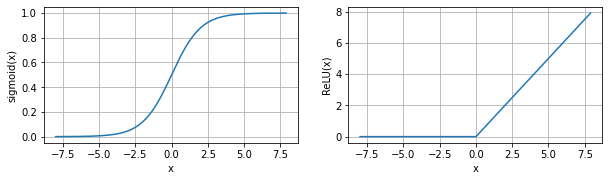

In [ ]:
# Plot the two activation functions with x from -10 to 10
# <hint>some useful funtions in plt: plot, subplot, xlabel, ylebel, grid, figsize 
x = np.arange(-8, 8, 0.1)
y1 = sigmoid(x)
y2 = ReLU(x)
plt.figure(figsize = (10, 2.5))
plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid();

## Single-layer Perceptron with ReLU




In [ ]:
# Training data
b = np.ones(myArr.shape[0])
x = np.column_stack((myArr[:,1:],b.T))
y = np.array(myArr[:,0])
w = np.zeros(x.shape[1])

for t in tqdm(range(step)):
    y_pred = ReLU(np.dot(x, w))
    w += eta * np.dot((y - y_pred), x)

In [ ]:
# To see the value of weight vector
w

array([ -602944.5 , -6480401.5 , -5735531.75,  -240394.5 ])

In [ ]:
# To see the prediction
ReLU(np.dot(x, w))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Single-layer Perceptron with sigmoid

---
maybe you will meet the warning --RuntimeWarning: overflow encountered in exp-- 

It is because of the calculation with the exponential function.
It is OK if you don't solve this problem and the code still works.



In [ ]:
# Training data
b = np.ones(myArr.shape[0])
x = np.column_stack((myArr[:,1:],b.T))
y = np.array(myArr[:,0])
w = np.zeros(x.shape[1])


for t in tqdm(range(step)):
    y_pred = sigmoid(np.dot(x, w))
    w += np.dot((y - y_pred), x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [ ]:
# To see the value of weight vector
w

array([  450.63847531,   295.043629  ,  -106.97020591, -3164.3296378 ])

In [ ]:
# To see the prediction
sigmoid(np.dot(x, w))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.07287064e-199, 4.07287064e-199,
       4.07287064e-199, 4.07287064e-199, 1.94603415e-117, 1.94603415e-117,
       1.94603415e-117, 1.94603415e-117])